In [30]:
import pandas as pd
df = pd.read_csv('C:/Users/ktang28/SandboxProj_DiamondsPredictor/diamonds.csv')

from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [32]:
# clustering

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)
    
print(clusters)
    
print(clusters[0:5])

[2 0 0 ... 0 0 2]
[2 0 0 0 2]


In [34]:
df["clusters"] = clusters.tolist()
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clusters
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,2
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,0
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,0
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,0
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,2
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50,2
53936,53937,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61,2
53937,53938,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56,0
53938,53939,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74,0


In [40]:
distortions = []
spread = range(1, 36)

for k in spread:
    model_KM = KMeans(n_clusters = k, n_init=10, random_state = 0).fit(X_scaled)
    distortions.append(model_KM.inertia_)
print(distortions)

[593339.9999999997, 382544.3694871006, 332636.8085504124, 305614.2729769281, 287553.184135517, 270086.933634318, 257257.71683349417, 245592.5553739233, 234662.2326377805, 225605.31491196528, 218375.59307612127, 211501.4927547918, 205780.36496732844, 200565.13598032316, 195274.4710729709, 190385.5518129974, 185895.87741427796, 183524.8419602997, 179091.66404985895, 175204.13865305347, 172131.3254865479, 168250.78304412245, 165543.70406679623, 162336.59441826987, 160041.5273620453, 157218.68276946998, 154558.33026253188, 152750.40941938607, 150707.8003937247, 148407.80060618464, 146853.10160562332, 144963.75690908567, 143476.406706109, 141323.66422282162, 139690.24189315137]


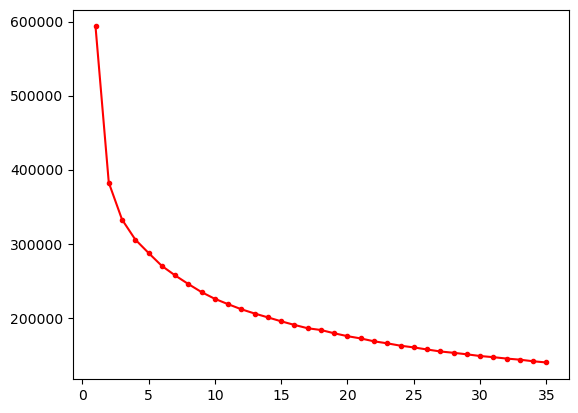

In [42]:
import matplotlib.pyplot as plt

plt.plot(spread,distortions, marker = ".", c = "red" )
plt.show()

In [48]:
clusters_agg = KMeans(n_clusters = 8, n_init=10, random_state = 0).fit_predict(X_scaled)

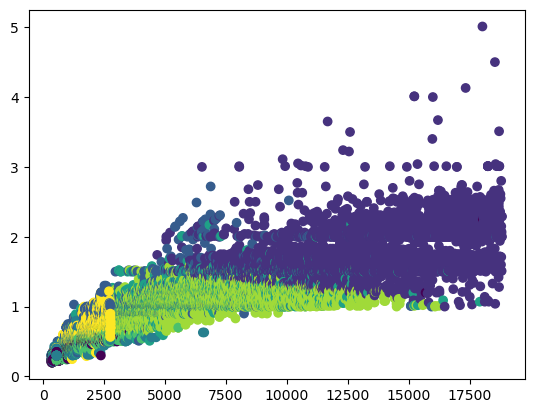

In [52]:
df["clusters_agg"] = clusters_agg.tolist()
plt.scatter(df["price"], df["carat"], c = df.clusters_agg)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clusters_agglom = AgglomerativeClustering(n_clusters = 8, linkage = "ward").fit_predict(X_scaled)
print(clusters_agglom)

In [ ]:
df["clusters_agglom"] = clusters_agglom.tolist()
plt.scatter(df["price"], df["carat"], c = df.clusters_agglom)


In [ ]:
from sklearn.cluster import MeanShift
mean_shift= MeanShift(bandwidth = 1.0)
mean_shift.fit(X_scaled)
     
clusters_ms = mean_shift.predict(X_scaled)
print(clusters_ms)     
